In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [31]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [32]:
College = load_data('College')


In [33]:
College.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [34]:
allvars = list(College.columns.drop('Apps'))
X = MS(allvars).fit_transform(College)
y = College['Apps']

In [35]:
corr_mat = X.corr()
corr_mat


,intercept,Private[Yes],Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private[Yes],NaN,1.000000,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Accept,NaN,-0.475252,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,NaN,-0.567908,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,NaN,0.164132,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,NaN,0.095752,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,NaN,-0.615561,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,NaN,-0.452088,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,NaN,0.552650,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,NaN,0.340532,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123) # default: stratify=label

In [37]:
################################################
# Problem 1-a. Learning Linear regression
#################################################

# fitting a linear model using least squares and 
# reporting the estimate of the test error

from sklearn.metrics import mean_squared_error

# 1) Fit least-squares linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
lm.coef_

array([ 0.00000000e+00, -4.05553207e+02,  1.72741939e+00, -1.36832304e+00,
        5.95613848e+01, -1.88162415e+01,  1.01784755e-01,  1.68738172e-02,
       -7.87800778e-02,  1.32157019e-01,  7.11580985e-02,  7.23848964e-03,
       -8.66852725e+00, -2.85109316e+00,  8.53165909e+00, -7.27873997e-01,
        5.44870902e-02,  5.68003515e+00])

In [39]:
lm.intercept_

np.float64(-37.30759035252504)

In [40]:
lm.score(X_train, y_train)   # train R^2

0.9371096250884561

In [41]:
# Training predictions
yhat_train = lm.predict(X_train)

# Training error (MSE)
train_mse = mean_squared_error(y_train, yhat_train)
train_mse


966655.7827471574

In [42]:
# 2) Predict on the test set
yhat_test = lm.predict(X_test)
print(f"Test  R^2: {r2_score(y_test, yhat_test):.4f}") # Test R^2


Test  R^2: 0.8818


In [43]:
# 3) Test error (MSE) 
test_mse = mean_squared_error(y_test, yhat_test)
#test_rmse = test_mse ** 0.5
test_mse

1573234.9173142374

In [44]:
################################################
# Problem 1-b. Single regression tree
#################################################

# fitting a tree the data, print the results, 
# display the tree, and report MSE 

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import r2_score

# ---- 1) Fit a regression tree ----
base_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=123) 
base_tree.fit(X_train, y_train)

# ---- 2) Predict + MSE on test ----
base_yhat_train = base_tree.predict(X_train)
base_yhat_test = base_tree.predict(X_test)
base_train_mse = mean_squared_error(y_train, base_yhat_train)
base_test_mse = mean_squared_error(y_test, base_yhat_test)

In [45]:
print("=== Regression Tree Results ===")
print(f"Train R^2: {base_tree.score(X_train, y_train):.4f}")
print(f"Test  R^2: {r2_score(y_test, base_yhat_test):.4f}")
print(f"Train MSE : {base_train_mse:.3f}")
print(f"Test MSE : {base_test_mse:.3f}")

print(f"Tree depth     : {base_tree.get_depth()}")
print(f"# of leaves    : {base_tree.get_n_leaves()}")

=== Regression Tree Results ===
Train R^2: 0.8481
Test  R^2: 0.8767
Train MSE : 2335378.161
Test MSE : 1642088.814
Tree depth     : 10
# of leaves    : 49


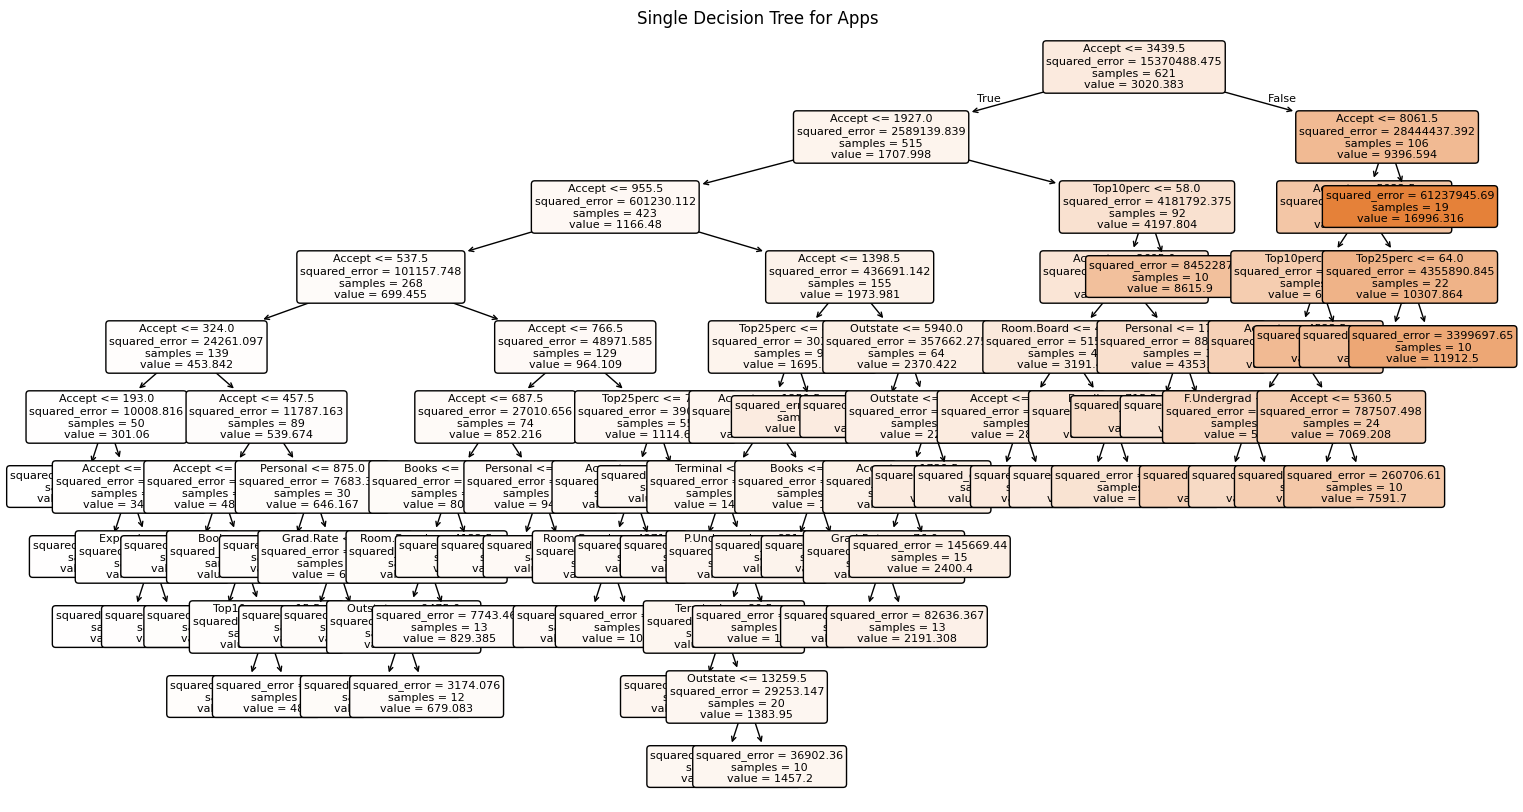

In [46]:
# ---- 3) Display the tree plot ----
plt.figure(figsize=(18, 10))
plot_tree(
    base_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Single Decision Tree for Apps")
plt.show()

In [47]:
################################################
# Problem 1-c. Tree pruning
#################################################

# Cross-validation: Is pruning helpful?, 
# Optimal size of pruned tree, MSE for the pruned tree, importance of predictors

# ----------------------------
# 1) Get candidate alphas for pruning
# ----------------------------
path = base_tree.cost_complexity_pruning_path(X_train, y_train)# working on the base_tree
ccp_alphas = path.ccp_alphas # one tree for each alpha

# Drop the largest alpha (often prunes everything to a stump) commonly.
ccp_alphas = ccp_alphas[:-1] if len(ccp_alphas) > 1 else ccp_alphas
ccp_alphas

array([0.00000000e+00, 9.11879137e+00, 1.53073098e+01, 3.95652979e+01,
       5.03336847e+01, 5.72273654e+01, 6.89372147e+01, 7.35111379e+01,
       8.92130368e+01, 1.06183843e+02, 1.30103850e+02, 1.72803945e+02,
       1.99934158e+02, 3.13567059e+02, 3.39744665e+02, 3.51398041e+02,
       3.73498343e+02, 5.50006005e+02, 6.09754519e+02, 7.21447917e+02,
       8.26429424e+02, 9.90703821e+02, 1.07670151e+03, 1.48405210e+03,
       1.72591723e+03, 2.56679116e+03, 2.93525628e+03, 3.49919083e+03,
       5.73213769e+03, 7.53616402e+03, 9.14830517e+03, 9.92869579e+03,
       1.42576175e+04, 2.56379778e+04, 2.75890222e+04, 2.80525756e+04,
       4.19759823e+04, 4.28669888e+04, 7.60156641e+04, 1.49359685e+05,
       2.56880731e+05, 3.13425186e+05, 3.52657077e+05, 1.11813491e+06,
       2.15299967e+06])

In [48]:
# --------------------------------------------
# 2) 10-fold cross-validate to pick best alpha
# --------------------------------------------
cv = KFold(n_splits=10, shuffle=True, random_state=123)

alpha_to_cv_mse = []
for a in ccp_alphas:
    t = DecisionTreeRegressor(random_state=123, ccp_alpha=a)
    # sklearn uses NEGATIVE MSE for scoring
    mse_scores = -cross_val_score(t, X_train, y_train, scoring="neg_mean_squared_error", cv=cv)
    alpha_to_cv_mse.append((a, mse_scores.mean(), mse_scores.std()))

# Choose alpha with smallest mean CV MSE
best_alpha, best_cv_mse, best_cv_sd = min(alpha_to_cv_mse, key=lambda x: x[1])

print("\nCV-selected pruning")
print(f"  best ccp_alpha : {best_alpha:.6g}")
print(f"  CV MSE (mean)  : {best_cv_mse:.3f}")
print(f"  CV MSE (sd)    : {best_cv_sd:.3f}")


CV-selected pruning
  best ccp_alpha : 25638
  CV MSE (mean)  : 3412506.365
  CV MSE (sd)    : 5395105.174


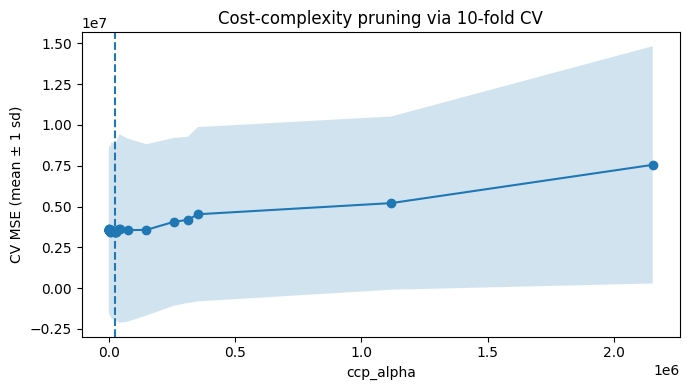

In [49]:
# ----------------------------
# 3) Plot CV curve for reference
# ----------------------------
alphas = np.array([x[0] for x in alpha_to_cv_mse])
cv_mse_means = np.array([x[1] for x in alpha_to_cv_mse])
cv_mse_sds = np.array([x[2] for x in alpha_to_cv_mse])

plt.figure(figsize=(7, 4))
plt.plot(alphas, cv_mse_means, marker="o")
plt.fill_between(alphas, cv_mse_means - cv_mse_sds, cv_mse_means + cv_mse_sds, alpha=0.2)
plt.axvline(best_alpha, linestyle="--")
plt.xlabel("ccp_alpha")
plt.ylabel("CV MSE (mean ± 1 sd)")
plt.title("Cost-complexity pruning via 10-fold CV")
plt.tight_layout()
plt.show()

In [50]:
# ----------------------------------------------------------
# 4) Fit pruned tree with best alpha, evaluate on test set
# ----------------------------------------------------------
pruned_tree = DecisionTreeRegressor(random_state=123, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)# go back to full Train data
from sklearn.metrics import r2_score

# Training predictions
pruned_yhat_train = pruned_tree.predict(X_train)
# Training R^2
pruned_train_r2 = pruned_tree.score(X_train, y_train)
# Compute train MSE
pruned_train_mse = mean_squared_error(y_train, pruned_tree.predict(X_train))


# Predict on the test set using the pruned tree
pruned_yhat_test = pruned_tree.predict(X_test)
# Compute test R^2
pruned_test_r2 = r2_score(y_test, pruned_yhat_test)
# Compute test MSE
pruned_test_mse = mean_squared_error(y_test, pruned_tree.predict(X_test))

print("\nPruned tree (refit on full training set)")
print(f"  depth   : {pruned_tree.get_depth()}")
print(f"  leaves  : {pruned_tree.get_n_leaves()}")
print(f"Train R^2 (pruned tree): {pruned_train_r2:.4f}")
print(f"Test R^2 (pruned tree): {pruned_test_r2:.4f}")

print(f"  train MSE: {pruned_train_mse:.3f}")
print(f"  test MSE: {pruned_test_mse:.3f}")

print("\nIs pruning useful?")# yes
print(f"  Δ test MSE (pruned - unpruned): {pruned_test_mse - base_test_mse:+.3f}")



Pruned tree (refit on full training set)
  depth   : 7
  leaves  : 20
Train R^2 (pruned tree): 0.9739
Test R^2 (pruned tree): 0.9033
  train MSE: 401318.401
  test MSE: 1287765.855

Is pruning useful?
  Δ test MSE (pruned - unpruned): -354322.959


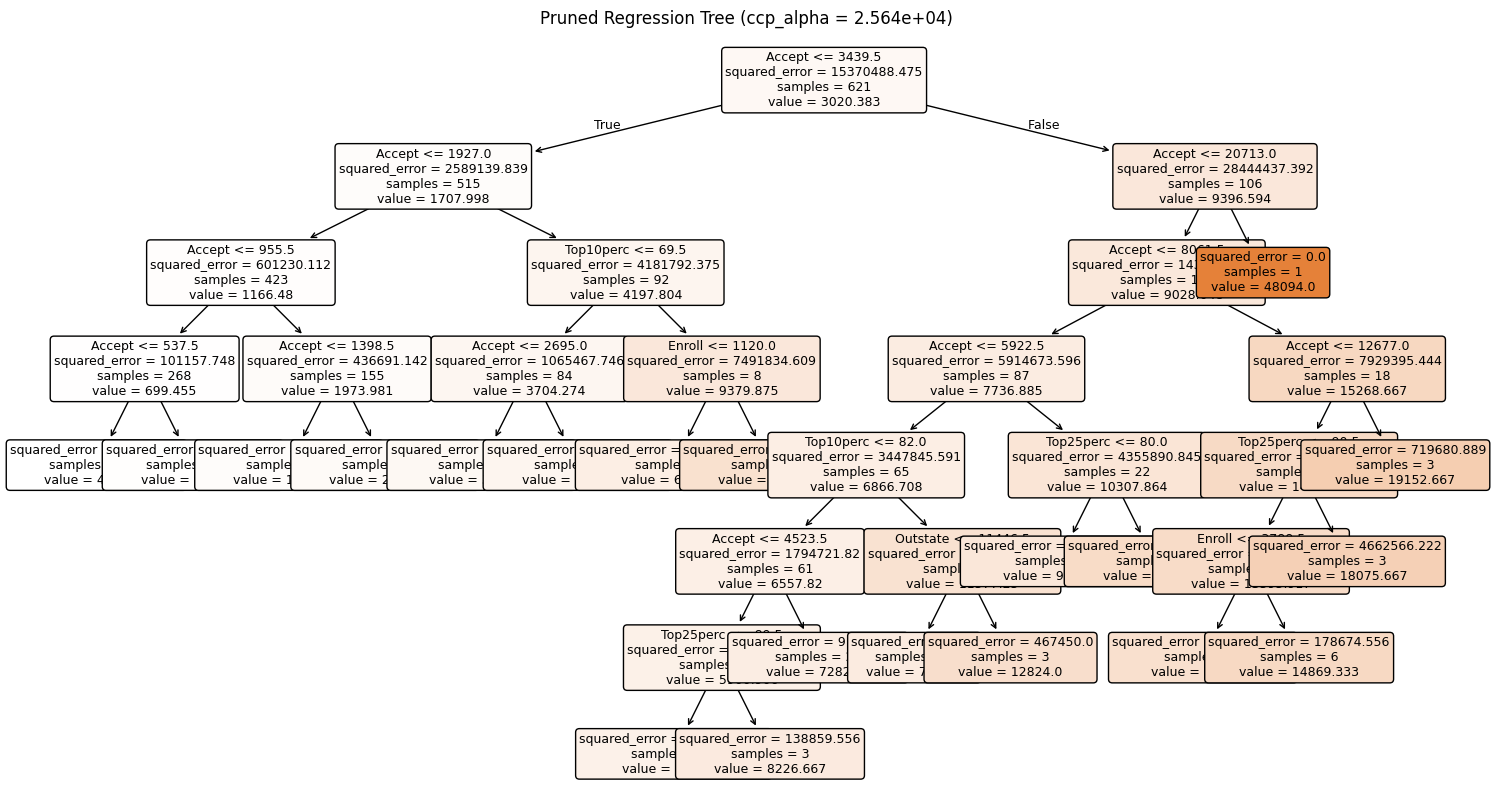

In [51]:
# ------------------------------------------
# 4) Plot the pruned tree with the best alpha
# -----------------------------------------

# Plot the pruned tree
plt.figure(figsize=(18, 10))
plot_tree(
    pruned_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title(f"Pruned Regression Tree (ccp_alpha = {best_alpha:.4g})")
plt.show()



Top predictor importances (pruned tree):
Accept             0.9412
Top10perc          0.0355
Top25perc          0.0137
Enroll             0.0076
Outstate           0.0020
Grad.Rate          0.0000
Expend             0.0000
perc.alumni        0.0000
Terminal           0.0000
S.F.Ratio          0.0000
Room.Board         0.0000
Books              0.0000
Personal           0.0000
PhD                0.0000
P.Undergrad        0.0000


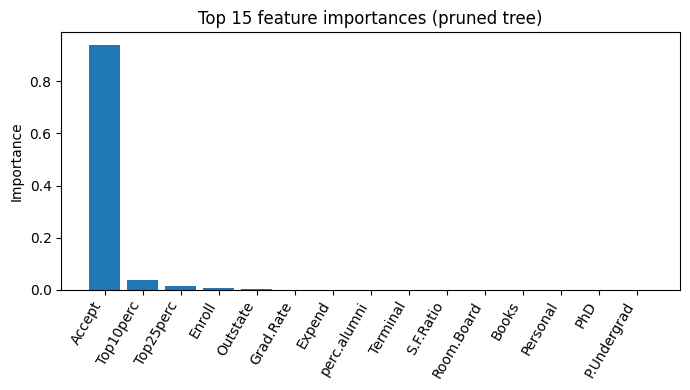

In [52]:
# ----------------------------
# 6) Predictor importance (from the pruned tree)
# ----------------------------
importances = pruned_tree.feature_importances_
feat_names = np.array(X_train.columns)

order = np.argsort(importances)[::-1]
topk = min(15, len(order))

print("\nTop predictor importances (pruned tree):")
for j in order[:topk]:
    print(f"{feat_names[j]:<18s} {importances[j]:.4f}")

# Optional: bar plot of top importances
plt.figure(figsize=(7, 4))
plt.bar(range(topk), importances[order[:topk]])
plt.xticks(range(topk), feat_names[order[:topk]], rotation=60, ha="right")
plt.ylabel("Importance")
plt.title(f"Top {topk} feature importances (pruned tree)")
plt.tight_layout()
plt.show()

In [53]:
#############################################################
# Problem 1-d. Bagging approach (m=p) using B=500 and B=1000
##############################################################
from sklearn.ensemble import RandomForestRegressor

def run_Bagging(B, X_train, y_train, X_test, y_test, max_features=17, random_state=123):
    bg = RandomForestRegressor(
        n_estimators=B, # number of bootstrapping
        random_state=random_state,
        n_jobs=-1 # using all processors in parallel
    )
    
    bg.fit(X_train, y_train)
    
    # Training predictions
    bg_yhat_train = bg.predict(X_train)
    # Training R^2
    bg_train_r2 = bg.score(X_train, y_train)
    # Compute train MSE
    bg_train_mse = mean_squared_error(y_train, bg_yhat_train)    
    
    # Predict on the test set using the bagged tree
    bg_yhat_test = bg.predict(X_test)
    # Compute test R^2
    bg_test_r2 = r2_score(y_test, bg_yhat_test)        
    # Test MSE
    bg_yhat_test = bg.predict(X_test)
    bg_test_mse = mean_squared_error(y_test, bg_yhat_test)
    
    # Variable importance
    bg_imp = bg.feature_importances_
    
    return bg, bg_train_r2,bg_test_r2,bg_train_mse, bg_test_mse, bg_imp

In [54]:
# ----------------------------------------------------------
# 1) Run models
# ----------------------------------------------------------
results = {}

for B in [500, 1000]:
    (bg, bg_train_r2, bg_test_r2, bg_train_mse,bg_test_mse, 
    bg_imp) = run_Bagging(B, X_train, y_train, X_test, y_test)
    results[B] = {"model": bg, "train_r2":bg_train_r2, "test_r2":bg_test_r2,
                  "train_mse":bg_test_mse,"test_mse": bg_test_mse, "importance": bg_imp} 
    
    print(f"\nBagging (B = {B})")    
    print(f"Train R^2(Bagging) : {bg_train_r2:.4f}")
    print(f"Test R^2 (Bagging): {bg_test_r2:.4f}")
    print(f"  train MSE: {bg_train_mse:.3f}")
    print(f"  test MSE: {bg_test_mse:.3f}") 
    
    


Bagging (B = 500)
Train R^2(Bagging) : 0.9788
Test R^2 (Bagging): 0.9102
  train MSE: 325296.484
  test MSE: 1195414.499

Bagging (B = 1000)
Train R^2(Bagging) : 0.9784
Test R^2 (Bagging): 0.9106
  train MSE: 332192.485
  test MSE: 1190635.450


In [55]:
# ----------------------------------------------------------
# 2) Compute importance
# ----------------------------------------------------------
# 

feature_names = np.array(X_train.columns)

for B in [500, 1000]:
    importances = results[B]["importance"]
    order = np.argsort(importances)[::-1]
    
    print(f"\nImportance (Bagging, B = {B}):")
    for j in order[:10]:
        print(f"{feature_names[j]:<18s} {importances[j]:.4f}")



Importance (Bagging, B = 500):
Accept             0.9053
Top10perc          0.0239
Top25perc          0.0167
Enroll             0.0114
Expend             0.0090
Outstate           0.0066
S.F.Ratio          0.0036
F.Undergrad        0.0033
Terminal           0.0033
Grad.Rate          0.0031

Importance (Bagging, B = 1000):
Accept             0.9035
Top10perc          0.0249
Top25perc          0.0167
Enroll             0.0127
Expend             0.0088
Outstate           0.0064
S.F.Ratio          0.0040
F.Undergrad        0.0033
Terminal           0.0033
Grad.Rate          0.0031


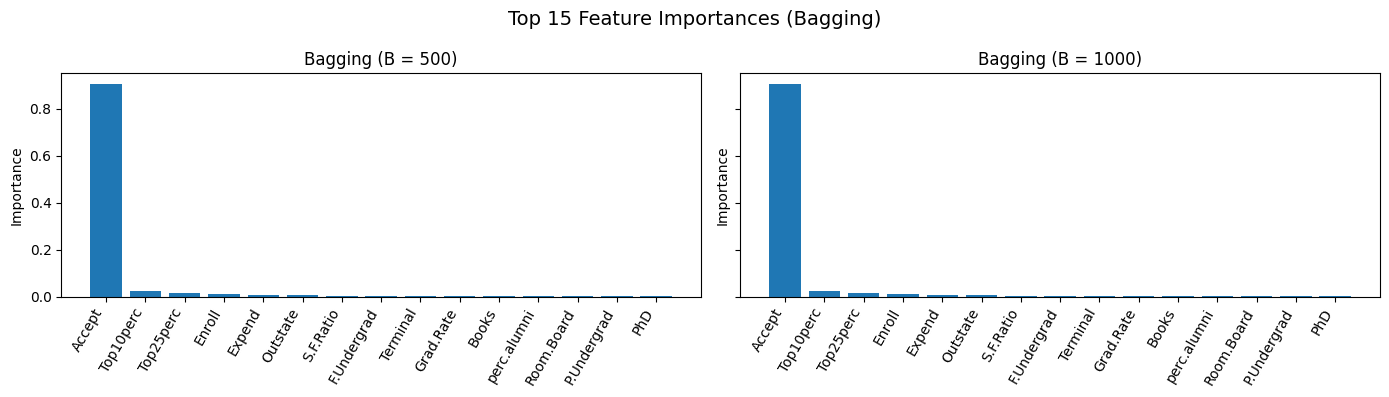

In [56]:
# ------------------------------------------
# 3) Plot Top feature importances: Bagging
#    B = 500 and B = 1000 (one figure)
# ------------------------------------------

feature_names = np.array(X_train.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

for ax, B in zip(axes, [500, 1000]):
    importances = results[B]["importance"]
    order = np.argsort(importances)[::-1]
    topk = min(15, len(order))

    ax.bar(
        range(topk),
        importances[order[:topk]]
    )
    ax.set_xticks(range(topk))
    ax.set_xticklabels(
        feature_names[order[:topk]],
        rotation=60,
        ha="right"
    )
    ax.set_title(f"Bagging (B = {B})")
    ax.set_ylabel("Importance")

fig.suptitle("Top 15 Feature Importances (Bagging)", fontsize=14)
plt.tight_layout()
plt.show()


In [57]:
###########################################################
# Problem 1-e. Random approach (m=3) using B=500 and B=1000 
############################################################

from sklearn.ensemble import RandomForestRegressor

def run_RandomForest(B, X_train, y_train, X_test, y_test, max_features = 3, random_state=123):
    rf = RandomForestRegressor(
        n_estimators=B, # number of bootstrapping
        random_state=random_state,
        n_jobs=-1 # using all processors in parallel
    )
    
    rf.fit(X_train, y_train)

     # Training predictions
    rf_yhat_train = rf.predict(X_train)
    # Training R^2
    rf_train_r2 = rf.score(X_train, y_train)
    # Compute train MSE
    rf_train_mse = mean_squared_error(y_train, rf_yhat_train)    
    
    # Predict on the test set using the bagged tree
    rf_yhat_test = rf.predict(X_test)
    # Compute test R^2
    rf_test_r2 = r2_score(y_test, rf_yhat_test)        
    # Test MSE
    rf_yhat_test = rf.predict(X_test)
    rf_test_mse = mean_squared_error(y_test, rf_yhat_test)
    
    # Variable importance
    rf_imp = rf.feature_importances_
    
    return rf, rf_train_r2,rf_test_r2,rf_train_mse, rf_test_mse, rf_imp


In [58]:
# ----------------------------------------------------------
# 1) Run models
# ----------------------------------------------------------
results = {}

for B in [500, 1000]:
    (rf, rf_train_r2, rf_test_r2, rf_train_mse,rf_test_mse, 
    rf_imp) = run_RandomForest(B, X_train, y_train, X_test, y_test)
    results[B] = {"model": rf, "train_r2":rf_train_r2, "test_r2":rf_test_r2,
                  "train_mse":rf_test_mse,"test_mse": rf_test_mse, "importance": rf_imp} 
    
    print(f"\nRanddomForest (B = {B})")    
    print(f"Train R^2(RandomForest) : {rf_train_r2:.4f}")
    print(f"Test R^2 (RandomForest): {rf_test_r2:.4f}")
    print(f"  train MSE: {rf_train_mse:.3f}")
    print(f"  test MSE: {rf_test_mse:.3f}")   
    
    


RanddomForest (B = 500)
Train R^2(RandomForest) : 0.9788
Test R^2 (RandomForest): 0.9102
  train MSE: 325296.484
  test MSE: 1195414.499

RanddomForest (B = 1000)
Train R^2(RandomForest) : 0.9784
Test R^2 (RandomForest): 0.9106
  train MSE: 332192.485
  test MSE: 1190635.450


In [59]:
# ----------------------------------------------------------
# 2) Compute importance
# ----------------------------------------------------------
# 

feature_names = np.array(X_train.columns)

for B in [500, 1000]:
    importances = results[B]["importance"]
    order = np.argsort(importances)[::-1]
    
    print(f"\nImportance (RandomForest, B = {B}):")
    for j in order[:10]:
        print(f"{feature_names[j]:<18s} {importances[j]:.4f}")



Importance (RandomForest, B = 500):
Accept             0.9053
Top10perc          0.0239
Top25perc          0.0167
Enroll             0.0114
Expend             0.0090
Outstate           0.0066
S.F.Ratio          0.0036
F.Undergrad        0.0033
Terminal           0.0033
Grad.Rate          0.0031

Importance (RandomForest, B = 1000):
Accept             0.9035
Top10perc          0.0249
Top25perc          0.0167
Enroll             0.0127
Expend             0.0088
Outstate           0.0064
S.F.Ratio          0.0040
F.Undergrad        0.0033
Terminal           0.0033
Grad.Rate          0.0031


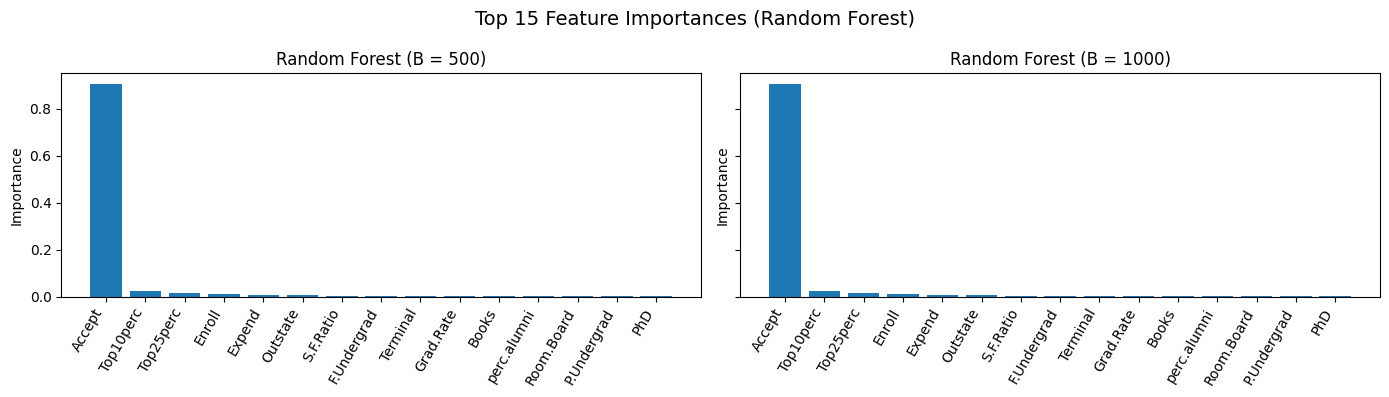

In [62]:
# ------------------------------------------
# 3) Plot Top feature importances: Bagging
#    B = 500 and B = 1000 (one figure)
# ------------------------------------------
# Robust version: re-fit RF and plot
# ------------------------------------------

feature_names = np.array(X_train.columns)

rf_imps = {}
for B in [500, 1000]:
    rf, _, _, _, _, rf_imp = run_RandomForest(B, X_train, y_train, X_test, y_test)
    rf_imp = np.asarray(rf_imp).ravel()          # force 1-D
    rf_imps[B] = rf_imp

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

for ax, B in zip(axes, [500, 1000]):
    importances = rf_imps[B]
    order = np.argsort(importances)[::-1]
    topk = min(15, importances.size)

    ax.bar(np.arange(topk), importances[order[:topk]])
    ax.set_xticks(np.arange(topk))
    ax.set_xticklabels(feature_names[order[:topk]], rotation=60, ha="right")
    ax.set_title(f"Random Forest (B = {B})")
    ax.set_ylabel("Importance")

fig.suptitle("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.tight_layout()
plt.show()
